In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
from torch import nn
import seaborn as sns

In [2]:
dfi = pd.read_csv('./Data/Stock/^GSPC.csv',parse_dates=True,index_col='Datetime')
dfi

,Close,High,Low,Open
Datetime,,,,
2022-10-31 13:30:00+00:00,3868.510010,3884.610107,3863.179932,3877.560059
2022-10-31 14:30:00+00:00,3883.570068,3886.030029,3863.939941,3868.550049
2022-10-31 15:30:00+00:00,3879.719971,3893.729980,3874.709961,3883.530029
2022-10-31 16:30:00+00:00,3883.560059,3883.889893,3868.469971,3879.719971
2022-10-31 17:30:00+00:00,3879.780029,3885.629883,3875.439941,3883.389893
...,...,...,...,...
2024-10-28 15:30:00+00:00,5833.310059,5834.930176,5824.310059,5834.020020
2024-10-28 16:30:00+00:00,5831.490234,5834.120117,5824.779785,5833.379883
2024-10-28 17:30:00+00:00,5831.359863,5836.049805,5830.689941,5831.540039


In [3]:
#dfi['date'] = pd.to_datetime(dfi['Time'])
# df = dfi.loc[dfi['date'] > '2024-02-01']
# df = df.loc[df['date'] < '2024-02-29' ]
# df

In [4]:
df = dfi[['Open','High','Low','Close']]
df = df.dropna()
#df = df.reset_index(drop=True)
df

,Open,High,Low,Close
Datetime,,,,
2022-10-31 13:30:00+00:00,3877.560059,3884.610107,3863.179932,3868.510010
2022-10-31 14:30:00+00:00,3868.550049,3886.030029,3863.939941,3883.570068
2022-10-31 15:30:00+00:00,3883.530029,3893.729980,3874.709961,3879.719971
2022-10-31 16:30:00+00:00,3879.719971,3883.889893,3868.469971,3883.560059
2022-10-31 17:30:00+00:00,3883.389893,3885.629883,3875.439941,3879.780029
...,...,...,...,...
2024-10-28 15:30:00+00:00,5834.020020,5834.930176,5824.310059,5833.310059
2024-10-28 16:30:00+00:00,5833.379883,5834.120117,5824.779785,5831.490234
2024-10-28 17:30:00+00:00,5831.540039,5836.049805,5830.689941,5831.359863


# **STATISTICAL TESTS**

<Axes: xlabel='Datetime'>

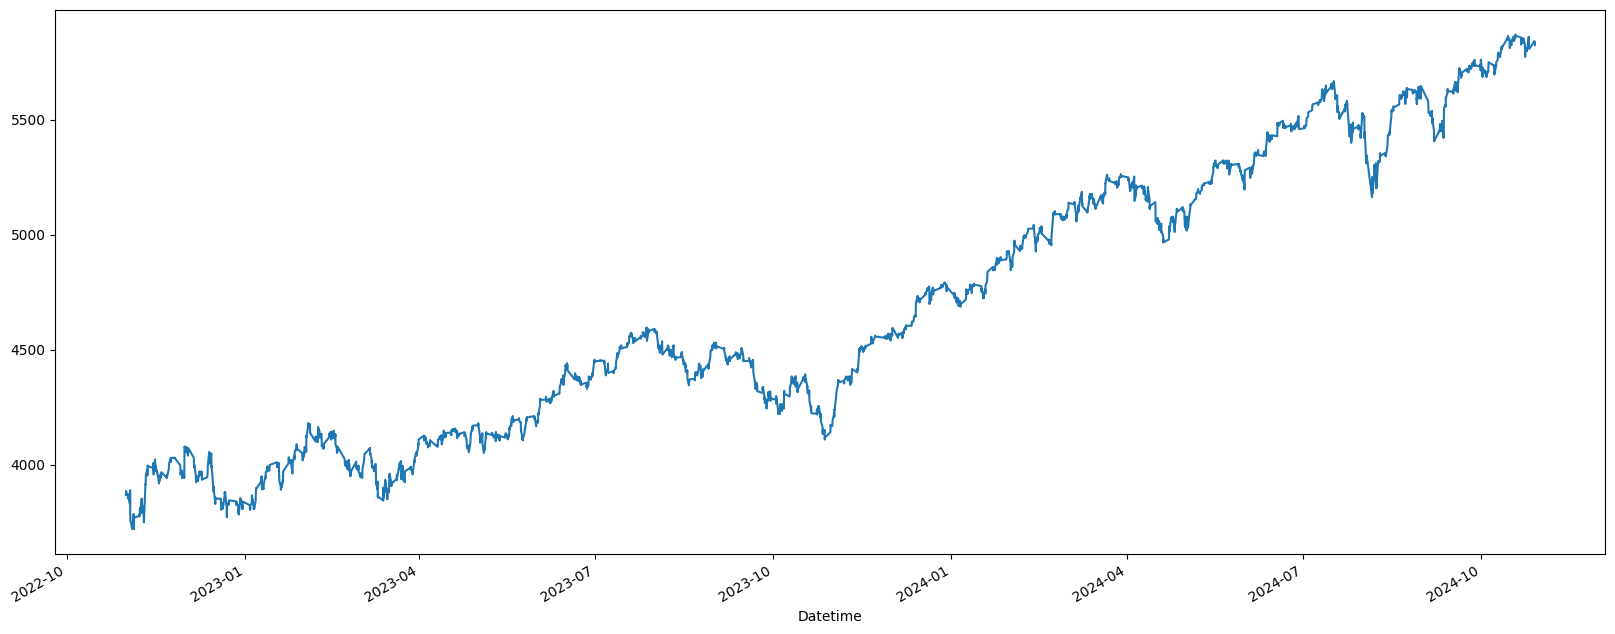

In [5]:
df['Close'].plot(figsize=(20,8))

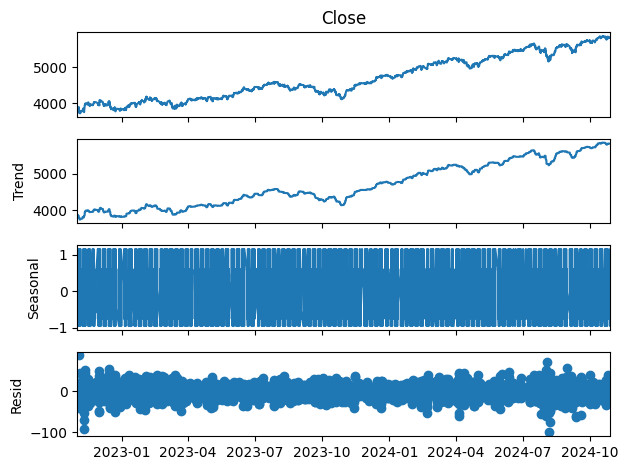

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=12) 
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [8]:
adf_test(df['Close'])

ADF Test Statistic : -0.06346243503669266
p-value : 0.9529583863992783
#Lags Used : 14
Number of Observations : 3476
weak evidence against null hypothesis,indicating it is non-stationary 


Text(0.5, 0, 'Time')

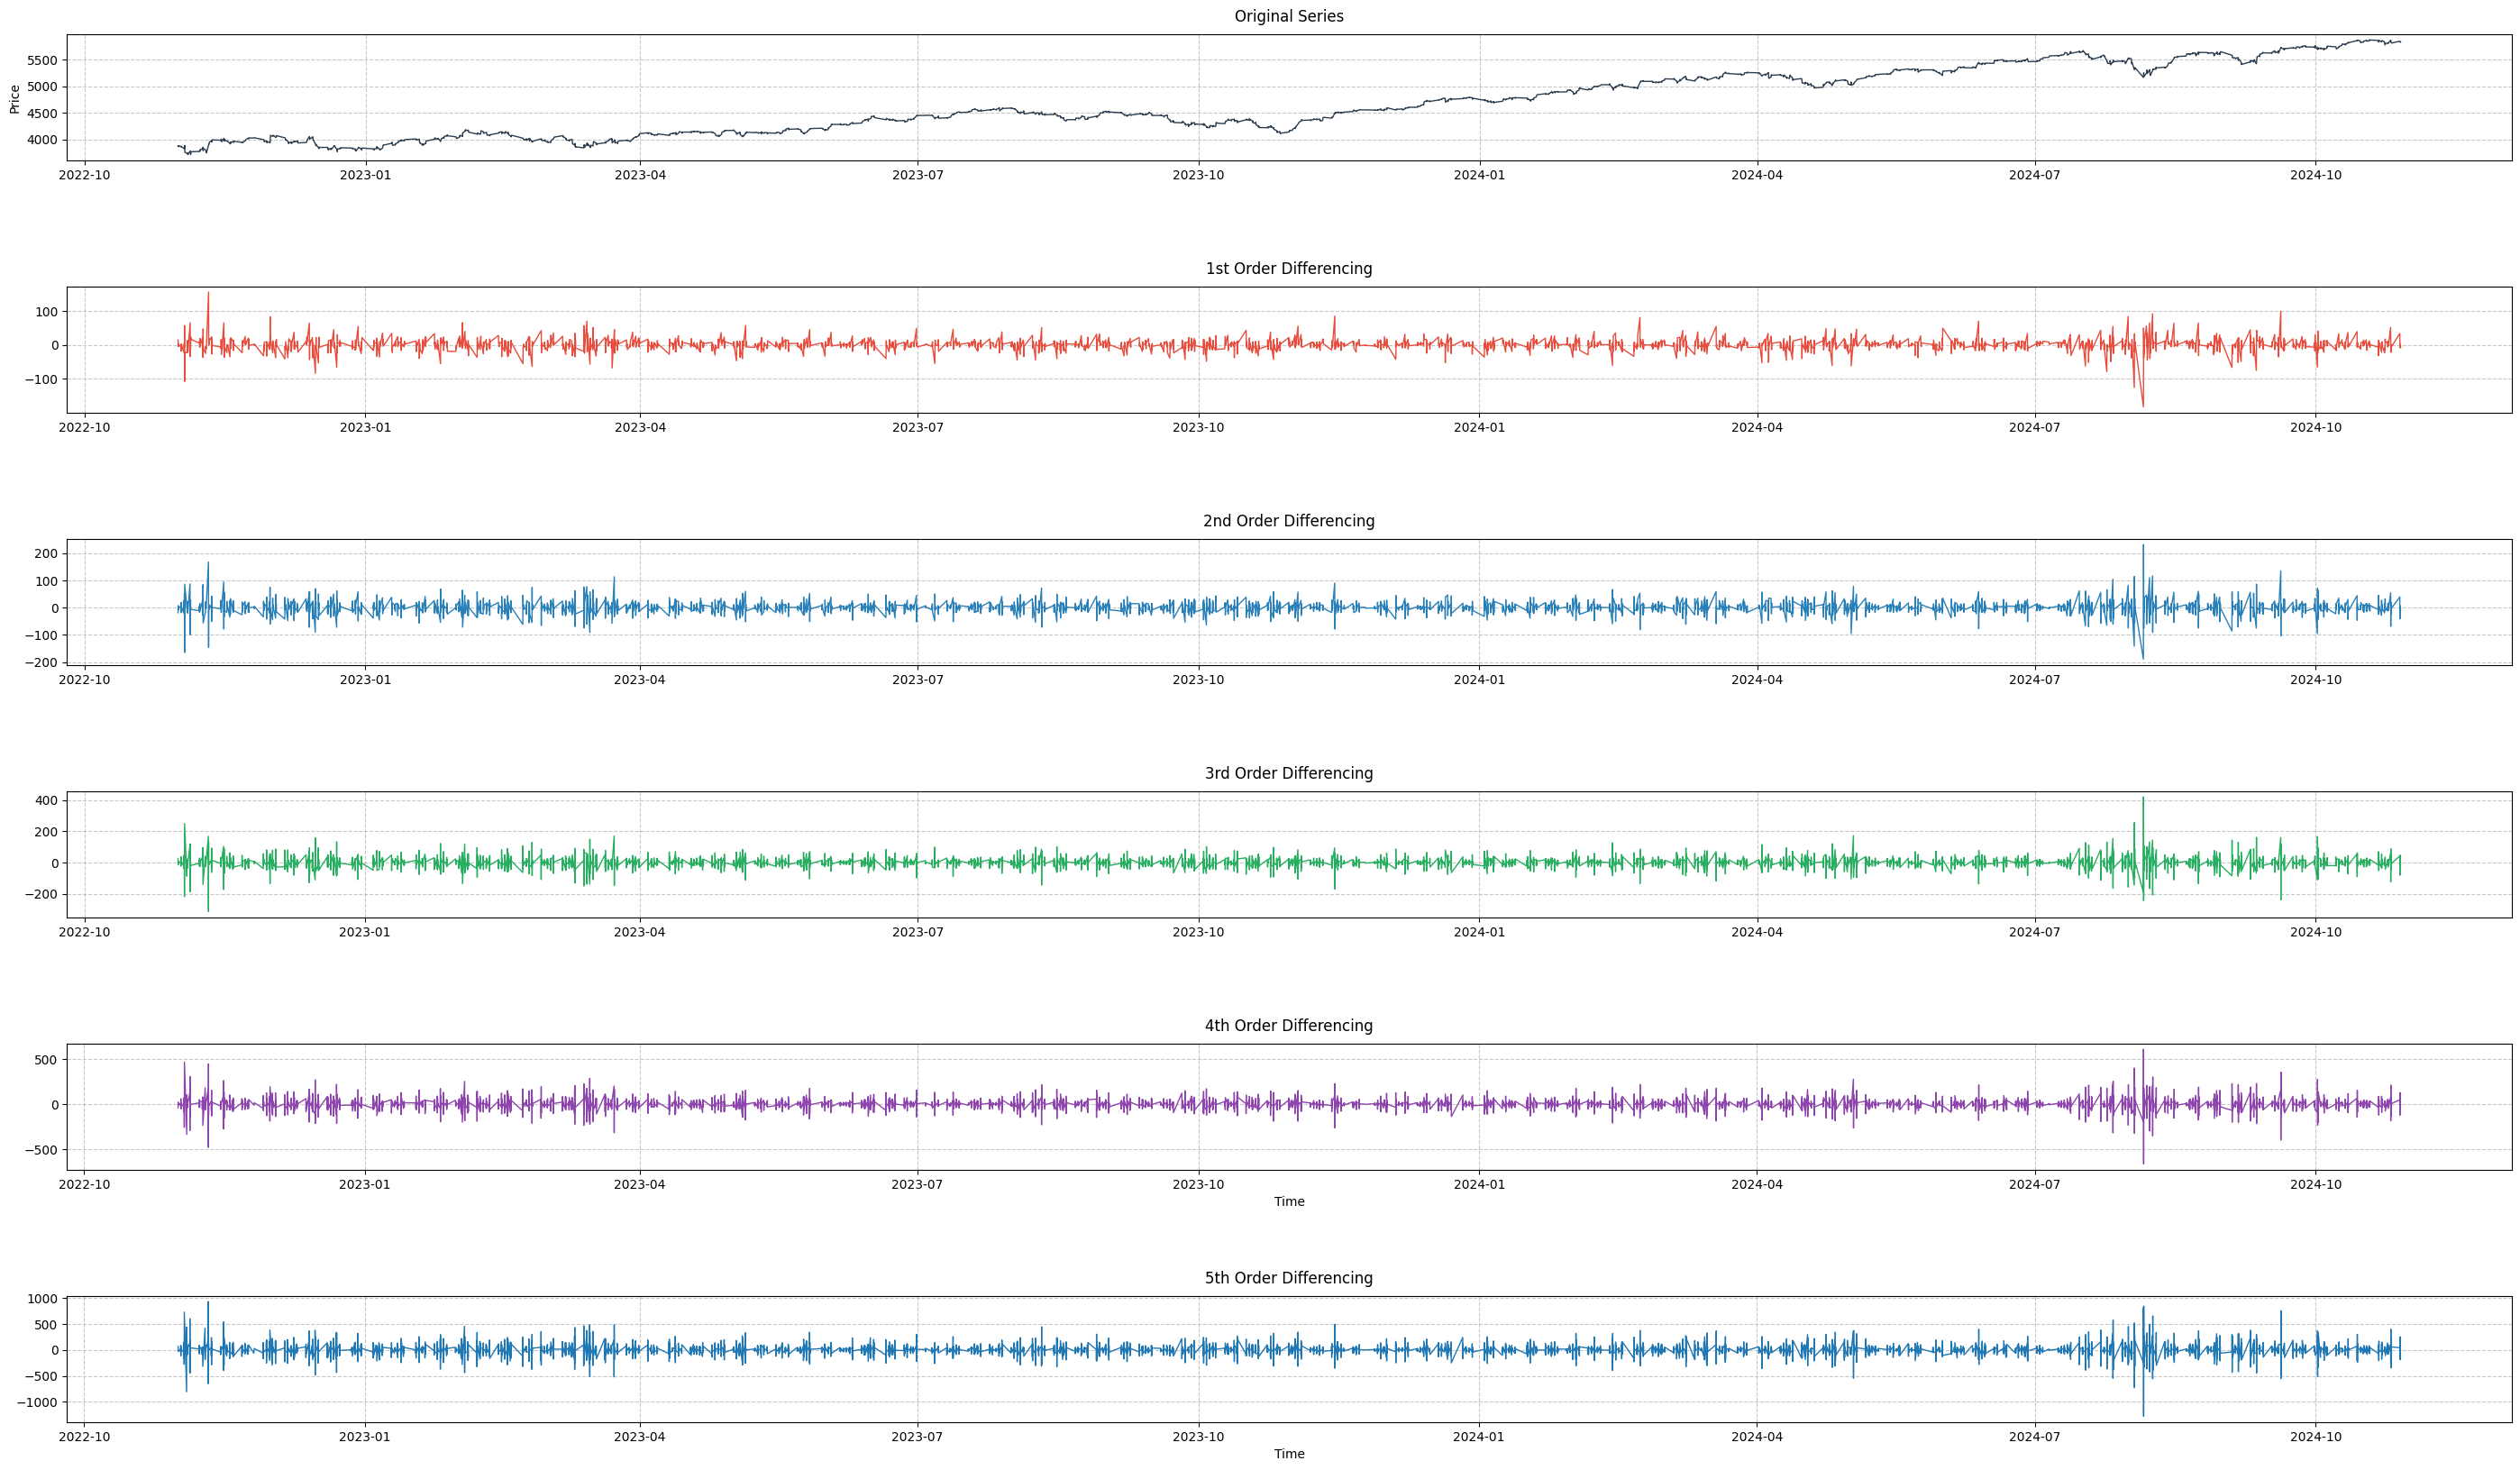

In [9]:
fig, axes = plt.subplots(6, 1, figsize=(35,20))

plt.subplots_adjust(hspace=1)
axes[0].plot(df['Close'], color='#2c3e50', linewidth=1)
axes[0].set_title('Original Series', pad=10)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_ylabel('Price')
    
# Plot 1st order differencing
axes[1].plot(df['Close'].diff(), color='#e74c3c', linewidth=1)
axes[1].set_title('1st Order Differencing', pad=10)
axes[1].grid(True, linestyle='--', alpha=0.7)

    
# Plot 2nd order differencing
axes[2].plot(df['Close'].diff().diff(), color='#2980b9', linewidth=1)
axes[2].set_title('2nd Order Differencing', pad=10)
axes[2].grid(True, linestyle='--', alpha=0.7)

    
# Plot 3rd order differencing
axes[3].plot(df['Close'].diff().diff().diff(), color='#27ae60', linewidth=1)
axes[3].set_title('3rd Order Differencing', pad=10)
axes[3].grid(True, linestyle='--', alpha=0.7)

    
# Plot 4th order differencing
axes[4].plot(df['Close'].diff().diff().diff().diff(), color='#8e44ad', linewidth=1)
axes[4].set_title('4th Order Differencing', pad=10)
axes[4].grid(True, linestyle='--', alpha=0.7)
axes[4].set_xlabel('Time')

# Plot 5th order differencing
axes[5].plot(df['Close'].diff().diff().diff().diff().diff(), linewidth=1)
axes[5].set_title('5th Order Differencing', pad=10)
axes[5].grid(True, linestyle='--', alpha=0.7)
axes[5].set_xlabel('Time')

<Figure size 1200x600 with 0 Axes>

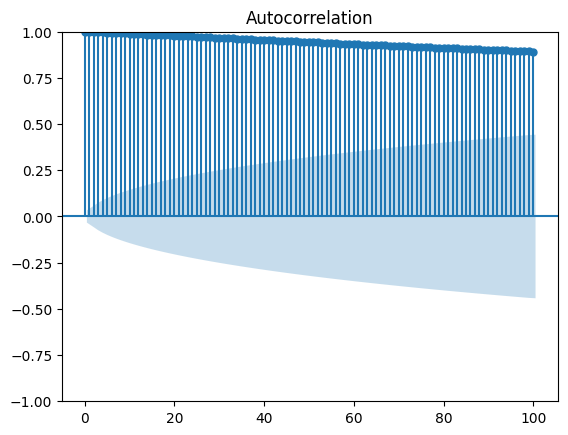

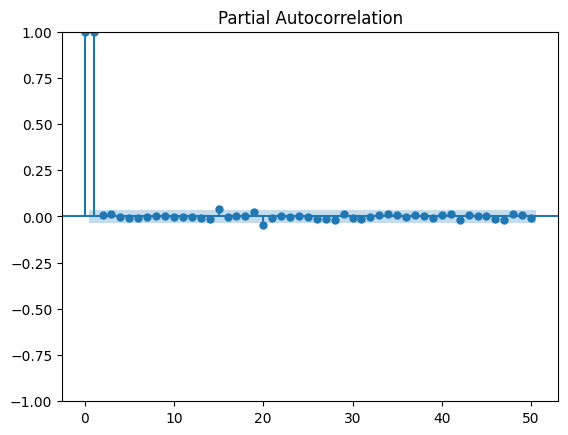

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=100) # p = 
plot_pacf(df['Close'], lags=50) # q = 
plt.show()

# **ARIMA MODEL**

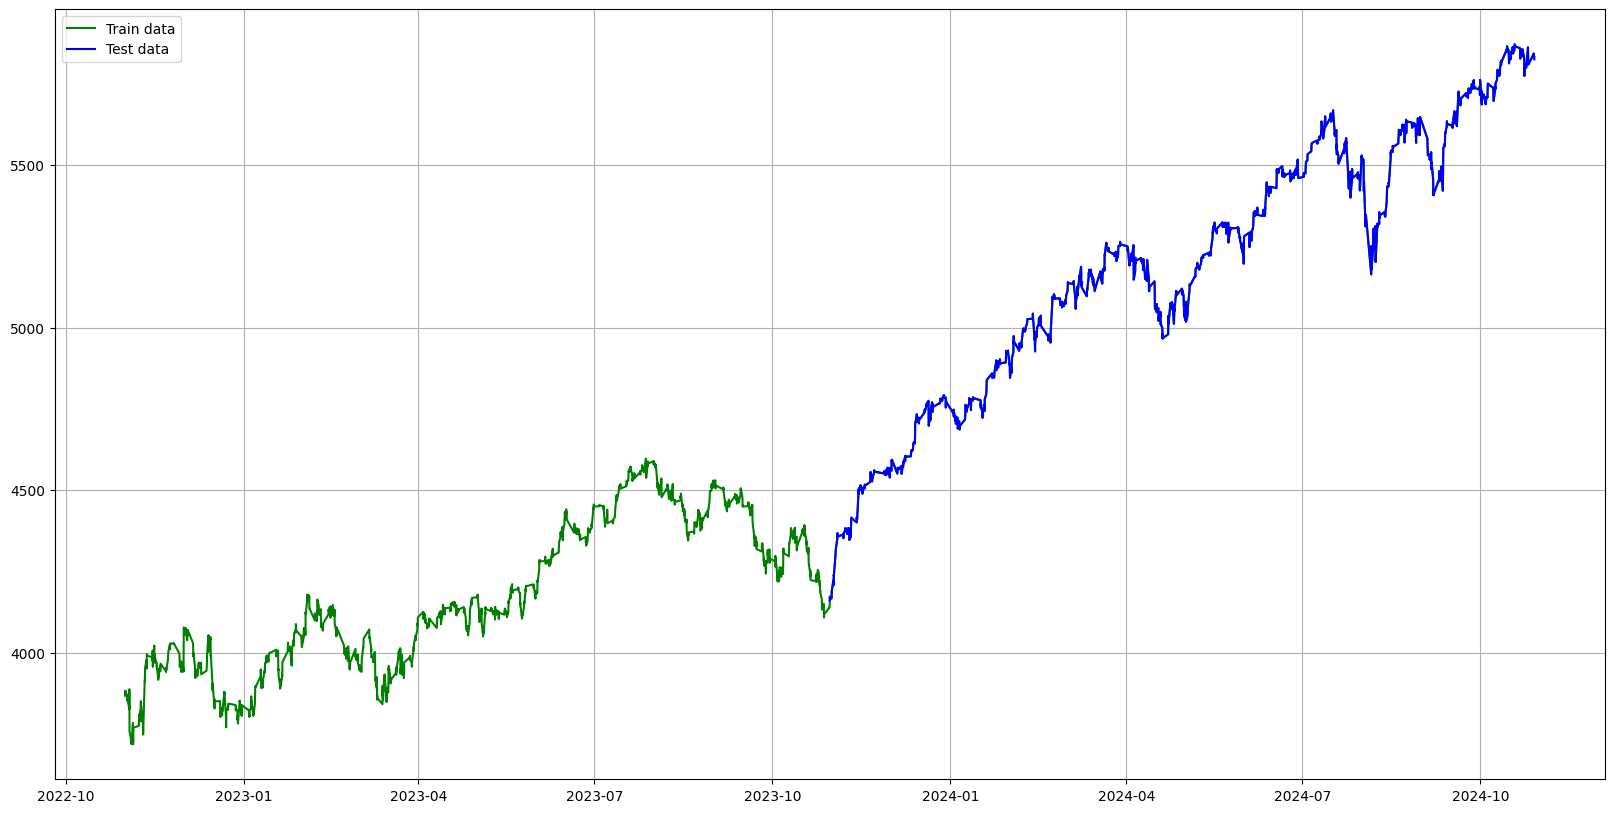

In [11]:
train_data, test_data = df[:int(len(df)*0.5)], df[int(len(df)*0.5):]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(df['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

In [12]:
'''import itertools
import warnings
warnings.filterwarnings("ignore")
q_arima = range(0, 5)
d_arima = range(0,5)
p_arima = range(0, 22)
AIC_arima = []
ARIMAX_model = []
pdqs = [(x[0], 1, 3) for x in list(itertools.product(p_arima,d_arima,q_arima))]

for pdq in pdqs:
    try:
        mod = ARIMA(train_data['Close'],order=pdq)

        results = mod.fit()
        print('ARIMAX{} - AIC:{}'.format(pdq, results.aic), end='\r')
        AIC_arima.append(results.aic)
        ARIMAX_model.append([(1,1,0), pdq])
    except:
            continue
    
print('The smallest AIC is {} for model ARIMAX{}'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))
order_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]'''

'import itertools\nimport warnings\nwarnings.filterwarnings("ignore")\nq_arima = range(0, 5)\nd_arima = range(0,5)\np_arima = range(0, 22)\nAIC_arima = []\nARIMAX_model = []\npdqs = [(x[0], 1, 3) for x in list(itertools.product(p_arima,d_arima,q_arima))]\n\nfor pdq in pdqs:\n    try:\n        mod = ARIMA(train_data[\'Close\'],order=pdq)\n\n        results = mod.fit()\n        print(\'ARIMAX{} - AIC:{}\'.format(pdq, results.aic), end=\'\r\')\n        AIC_arima.append(results.aic)\n        ARIMAX_model.append([(1,1,0), pdq])\n    except:\n            continue\n    \nprint(\'The smallest AIC is {} for model ARIMAX{}\'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))\norder_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]'

In [13]:
#The smallest AIC is 14395.771688101358 for model ARIMAX(6, 1, 3)
order_a = (6, 1, 3)

In [14]:
train, test = train_data['Close'], test_data['Close']

model = ARIMA(train, order=order_a)
result = model.fit()

forecast_a = result.get_forecast(steps=len(test))
predicted_mean = forecast_a.predicted_mean

mse = mean_squared_error(test, predicted_mean)
rmse = math.sqrt(mse)
print(f'Mean Squared Error: {mse}')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

Mean Squared Error: 1240872.3594483696


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
print(mse)
print(rmse)
#1107.641703382965

1240872.3594483696
1113.9445046537865


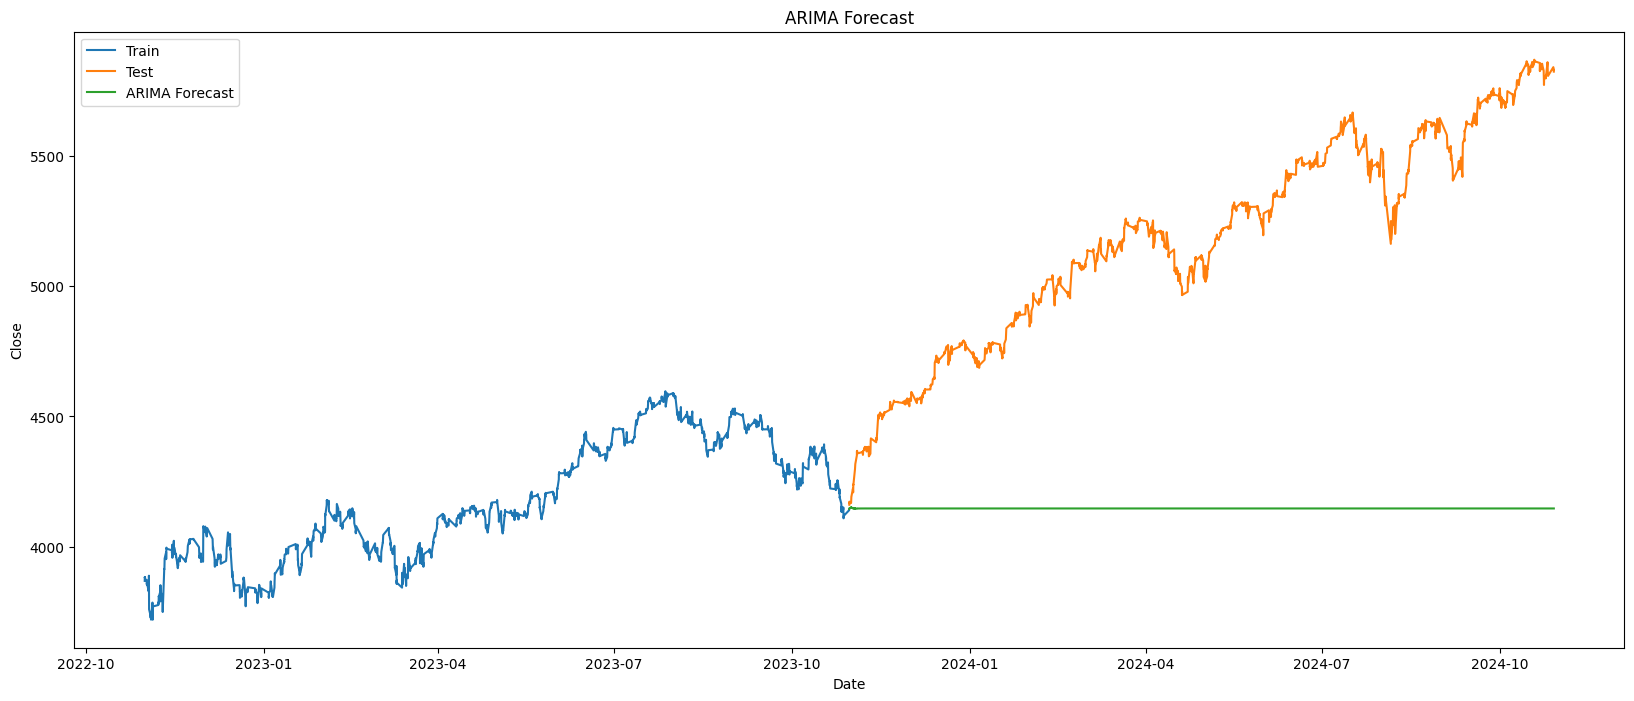

In [16]:
plt.figure(figsize=(20, 8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_mean, label='ARIMA Forecast')
# plt.fill_between(forecast.conf_int().index,
#                  forecast.conf_int().iloc[:, 0],
#                  forecast.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **QLSTM MODEL**

In [17]:
ARIMA_Result =  pd.DataFrame(columns=['raw', 'predicted','residuals'])
ARIMA_Result['raw'] = test_data['Close'].copy()
ARIMA_Result['predicted'] = predicted_mean.to_numpy()
ARIMA_Result['residuals'] = ARIMA_Result['raw'] - ARIMA_Result['predicted']
std_residuals = ARIMA_Result['residuals'].std()
ARIMA_Result['std_residuals'] = ARIMA_Result['residuals'] / std_residuals
ARIMA_Result['nxt_target'] = ARIMA_Result['residuals'].shift(-1)
ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
ARIMA_Result

/tmp/ipykernel_19793/4001742610.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
/tmp/ipykernel_19793/4001742610.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]


,raw,predicted,residuals,std_residuals,nxt_target
Datetime,,,,,
2023-10-30 16:30:00+00:00,4161.100098,4145.251400,15.848698,0.039588,17.472493
2023-10-30 17:30:00+00:00,4163.500000,4146.027507,17.472493,0.043644,24.784478
2023-10-30 18:30:00+00:00,4172.959961,4148.175483,24.784478,0.061909,18.092060
2023-10-30 19:30:00+00:00,4166.509766,4148.417706,18.092060,0.045192,18.045794
2023-10-31 13:30:00+00:00,4168.029785,4149.983991,18.045794,0.045077,17.978403
...,...,...,...,...,...
2024-10-28 15:30:00+00:00,5833.310059,4146.805726,1686.504333,4.212715,1684.684508
2024-10-28 16:30:00+00:00,5831.490234,4146.805726,1684.684508,4.208169,1684.554137
2024-10-28 17:30:00+00:00,5831.359863,4146.805726,1684.554137,4.207843,1686.114196


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import Parameter
import torch.utils.data as Data
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import pennylane as qml
import pytorch_lightning as pl
import math
import time

In [19]:
def data_process(data, window_size, predict_size):
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    d_y = scaler1.fit_transform(data.iloc[:,-1:]) 
    data = scaler2.fit_transform(data.iloc[:,:1])

    data_in = []
    data_out = []
    # range(window_size,len(data)-predict_size+1) range(data.shape[0] - window_size - predict_size + 1)
    for i in range(window_size,len(data)-predict_size+1):
        data_in.append(data[i-window_size:i,0:data.shape[0]])
        data_out.append(d_y[i + predict_size - 1:i + predict_size,0])

    data_in = np.array(data_in)
    data_out = np.array(data_out)

    data_process = {'datain': data_in, 'dataout': data_out}

    return data_process, scaler1 , scaler2

In [20]:
from numpy.random import default_rng
from qiskit_algorithms.utils import algorithm_globals
qubits = 2
seed = 42
np.random.seed(seed)
torch.manual_seed(42)
rng = default_rng(seed)
algorithm_globals.random_seed = seed
features_size = 1
#window_size = features_size * 3
window_size = 10
predict_size = 1

In [21]:
size = int(len(ARIMA_Result) * 0.5)

train = ARIMA_Result[['residuals','nxt_target']][:size].copy()
test = ARIMA_Result[['residuals','nxt_target']][size:].copy()

In [22]:
train_processed, train_target_scalar, train_scaler = data_process(train, window_size, predict_size)
X_train, y_train = train_processed['datain'], train_processed['dataout']

test_processed, test_target_scalar, test_scaler = data_process(test, window_size, predict_size)
X_test, y_test = test_processed['datain'], test_processed['dataout']

In [23]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [24]:
class QLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.backend = backend  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        #self.dev = qml.device("default.qubit", wires=self.n_qubits)
        #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
        #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
        # use 'qiskit.ibmq' instead to run on hardware

        self.wires_forget = [f"wire_forget_{i}" for i in range(self.n_qubits)]
        self.wires_input = [f"wire_input_{i}" for i in range(self.n_qubits)]
        self.wires_update = [f"wire_update_{i}" for i in range(self.n_qubits)]
        self.wires_output = [f"wire_output_{i}" for i in range(self.n_qubits)]

        self.dev_forget = qml.device(self.backend, wires=self.wires_forget)
        self.dev_input = qml.device(self.backend, wires=self.wires_input)
        self.dev_update = qml.device(self.backend, wires=self.wires_update)
        self.dev_output = qml.device(self.backend, wires=self.wires_output)

        def _circuit_forget(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget]
        self.qlayer_forget = qml.QNode(_circuit_forget, self.dev_forget, interface="torch")

        def _circuit_input(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input]
        self.qlayer_input = qml.QNode(_circuit_input, self.dev_input, interface="torch")

        def _circuit_update(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update]
        self.qlayer_update = qml.QNode(_circuit_update, self.dev_update, interface="torch")

        def _circuit_output(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output]
        self.qlayer_output = qml.QNode(_circuit_output, self.dev_output, interface="torch")

        weight_shapes = {"weights": (n_qlayers, n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_qubits) = ({n_qlayers}, {n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, n_qubits)
        self.VQC = {
            'forget': qml.qnn.TorchLayer(self.qlayer_forget, weight_shapes),
            'input': qml.qnn.TorchLayer(self.qlayer_input, weight_shapes),
            'update': qml.qnn.TorchLayer(self.qlayer_update, weight_shapes),
            'output': qml.qnn.TorchLayer(self.qlayer_output, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)
        #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]

    def forward(self, x, init_states=None):
        '''
        x.shape is (batch_size, seq_length, feature_size)
        recurrent_activation -> sigmoid
        activation -> tanh
        '''
        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t = torch.zeros(batch_size, self.hidden_size)  # cell state
        else:
            # for now we ignore the fact that in PyTorch you can stack multiple RNNs
            # so we take only the first elements of the init_states tuple init_states[0][0], init_states[1][0]
            h_t, c_t = init_states
            h_t = h_t[0]
            c_t = c_t[0]

        for t in range(seq_length):
            # get features from the t-th element in seq, for all entries in the batch
            x_t = x[:, t, :]

            # Concatenate input and hidden state
            v_t = torch.cat((h_t, x_t), dim=1)

            # match qubit dimension
            y_t = self.clayer_in(v_t)

            f_t = torch.sigmoid(self.clayer_out(self.VQC['forget'](y_t)))  # forget block
            i_t = torch.sigmoid(self.clayer_out(self.VQC['input'](y_t)))  # input block
            g_t = torch.tanh(self.clayer_out(self.VQC['update'](y_t)))  # update block
            o_t = torch.sigmoid(self.clayer_out(self.VQC['output'](y_t))) # output block

            c_t = (f_t * c_t) + (i_t * g_t)
            h_t = o_t * torch.tanh(c_t)

            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

class QRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = QLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [25]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = QRegressionLSTM(num_sensors=1, hidden_units= 6, n_qubits=1)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

weight_shapes = (n_qlayers, n_qubits) = (1, 1)


In [26]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)}')

[1/5]  LossQ:106.03418607425556
[2/5]  LossQ:194.2780439669732
[3/5]  LossQ:155.68682385818101
[4/5]  LossQ:84.26955331267709
[5/5]  LossQ:40.54903130202001


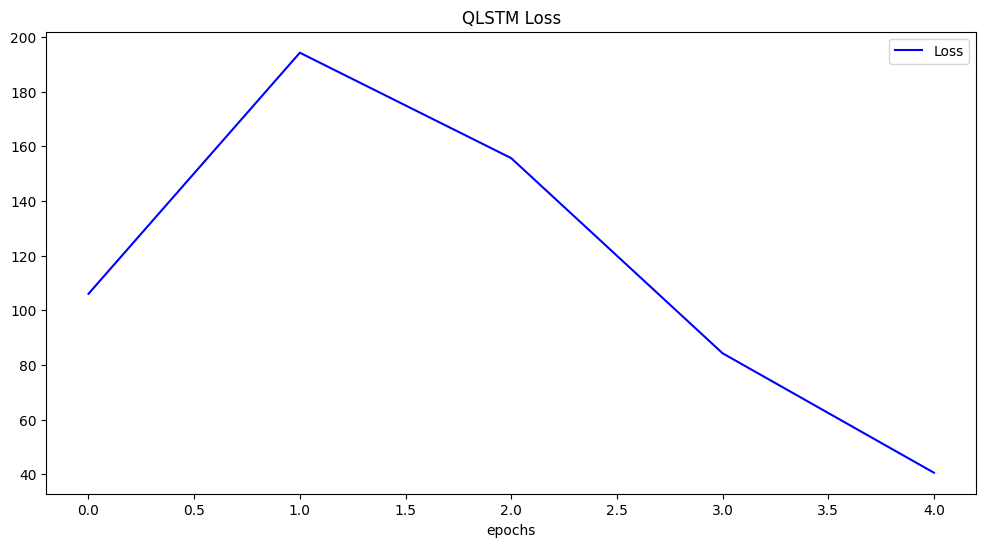

In [27]:
np.savetxt('./SavedModels/Stock/SNP500/loss/arima_qlstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('QLSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [28]:
histQ1 = histQ 

In [29]:
def predict(data_loader, model):
    """Just like `test_loop` function but keep track of the outputs instead of the loss
    function.
    """
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)


    return output

In [30]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)

print(pred_y_train)

tensor([-0.3735, -0.3900, -0.4012, -0.4344, -0.4461, -0.4546, -0.4576, -0.4612,
        -0.4858, -0.4661, -0.5088, -0.5334, -0.5404, -0.5526, -0.5639, -0.5689,
        -0.5405, -0.5620, -0.5495, -0.5717, -0.5652, -0.5772, -0.5886, -0.5801,
        -0.5808, -0.5887, -0.5987, -0.5935, -0.5813, -0.5766, -0.5676, -0.5649,
        -0.5805, -0.5684, -0.5691, -0.5731, -0.5794, -0.5776, -0.5838, -0.5968,
        -0.5778, -0.5721, -0.5762, -0.5718, -0.5865, -0.5687, -0.5767, -0.5873,
        -0.6071, -0.6121, -0.6030, -0.5862, -0.5635, -0.5616, -0.5439, -0.5422,
        -0.5407, -0.5419, -0.5688, -0.5456, -0.5483, -0.5593, -0.5472, -0.5536,
        -0.5612, -0.4332, -0.4519, -0.4760, -0.4660, -0.4752, -0.4566, -0.4778,
        -0.4482, -0.4528, -0.4634, -0.4686, -0.4577, -0.4646, -0.4703, -0.4663,
        -0.4910, -0.4721, -0.4726, -0.4796, -0.4685, -0.4612, -0.4618, -0.4690,
        -0.4631, -0.4554, -0.4538, -0.4520, -0.4575, -0.4401, -0.4335, -0.4312,
        -0.4201, -0.4180, -0.4046, -0.41

In [31]:
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)
pred_y_train

tensor([[-0.3735],
        [-0.3900],
        [-0.4012],
        [-0.4344],
        [-0.4461],
        [-0.4546],
        [-0.4576],
        [-0.4612],
        [-0.4858],
        [-0.4661],
        [-0.5088],
        [-0.5334],
        [-0.5404],
        [-0.5526],
        [-0.5639],
        [-0.5689],
        [-0.5405],
        [-0.5620],
        [-0.5495],
        [-0.5717],
        [-0.5652],
        [-0.5772],
        [-0.5886],
        [-0.5801],
        [-0.5808],
        [-0.5887],
        [-0.5987],
        [-0.5935],
        [-0.5813],
        [-0.5766],
        [-0.5676],
        [-0.5649],
        [-0.5805],
        [-0.5684],
        [-0.5691],
        [-0.5731],
        [-0.5794],
        [-0.5776],
        [-0.5838],
        [-0.5968],
        [-0.5778],
        [-0.5721],
        [-0.5762],
        [-0.5718],
        [-0.5865],
        [-0.5687],
        [-0.5767],
        [-0.5873],
        [-0.6071],
        [-0.6121],
        [-0.6030],
        [-0.5862],
        [-0.

In [32]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [33]:
np.savetxt('./SavedModels/Stock/SNP500/train/arima_qlstm.txt',y_train_pred)
np.savetxt('./SavedModels/Stock/SNP500/test/arima_qlstm.txt',y_test_pred)

Training dataset MSE: 18101.509018276873 RMSE:134.54184857610986


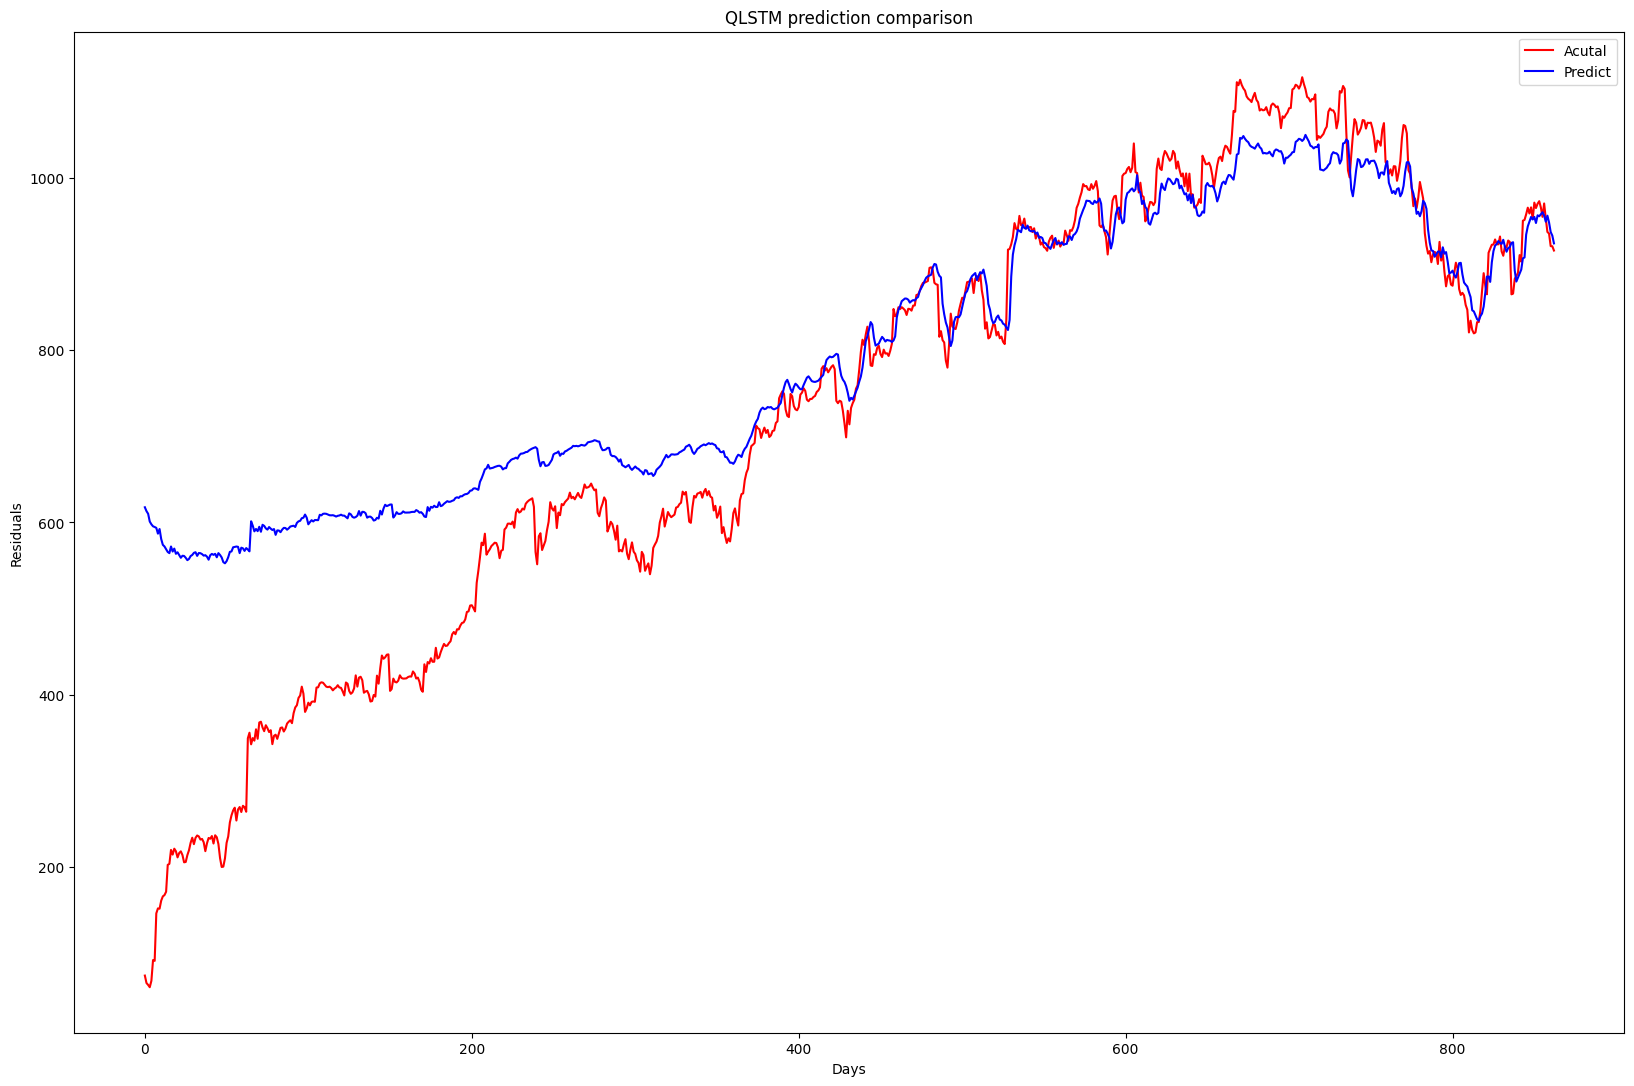

In [34]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('Residuals')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset MSE:8772.542147079626 RMSE:93.66185000884633


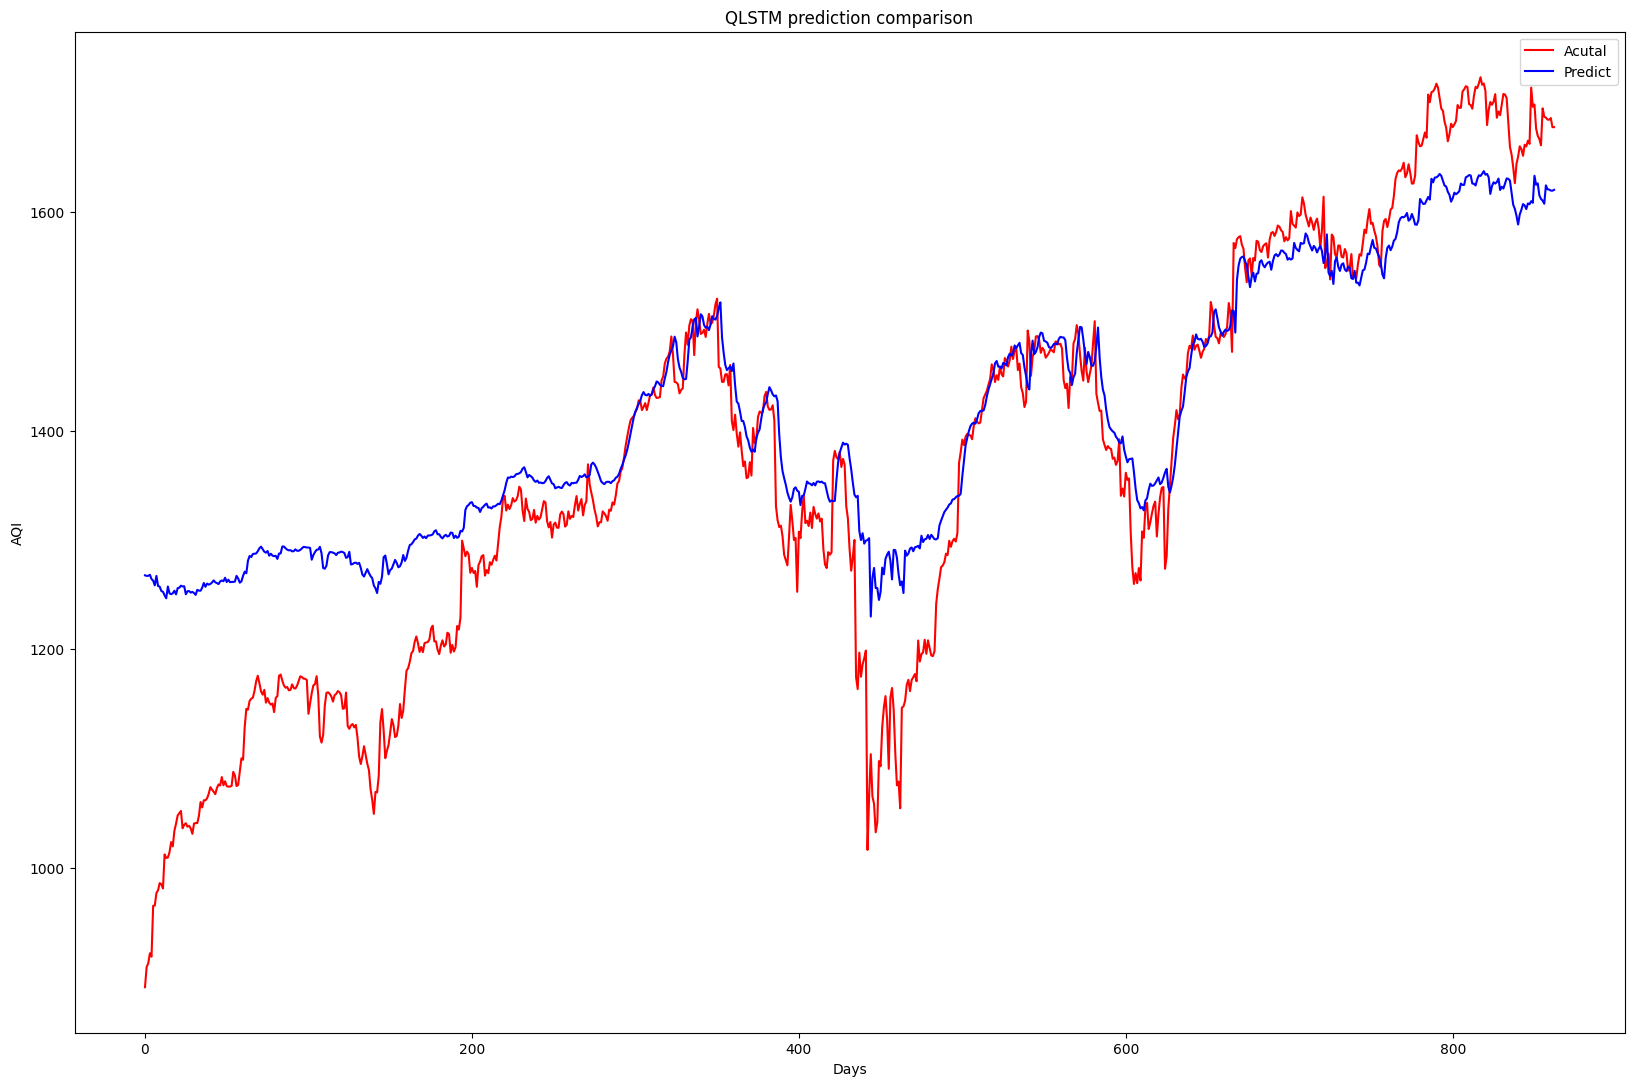

In [35]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('AQI')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE:{MSE} RMSE:{RMSE}')
#157.94773216116718

In [36]:
final_result_qlstm = ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [37]:
frq = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
frq['final'] = final_result_qlstm
frq

,predicted,raw,final
Datetime,,,
2024-05-02 14:30:00+00:00,4146.805726,5036.390137,5414.380555
2024-05-02 15:30:00+00:00,4146.805726,5037.419922,5413.892884
2024-05-02 16:30:00+00:00,4146.805726,5055.740234,5413.919618
2024-05-02 17:30:00+00:00,4146.805726,5059.330078,5414.916932
2024-05-02 18:30:00+00:00,4146.805726,5068.509766,5411.003114
...,...,...,...
2024-10-28 15:30:00+00:00,4146.805726,5833.310059,5767.745179
2024-10-28 16:30:00+00:00,4146.805726,5831.490234,5767.407777
2024-10-28 17:30:00+00:00,4146.805726,5831.359863,5766.491639


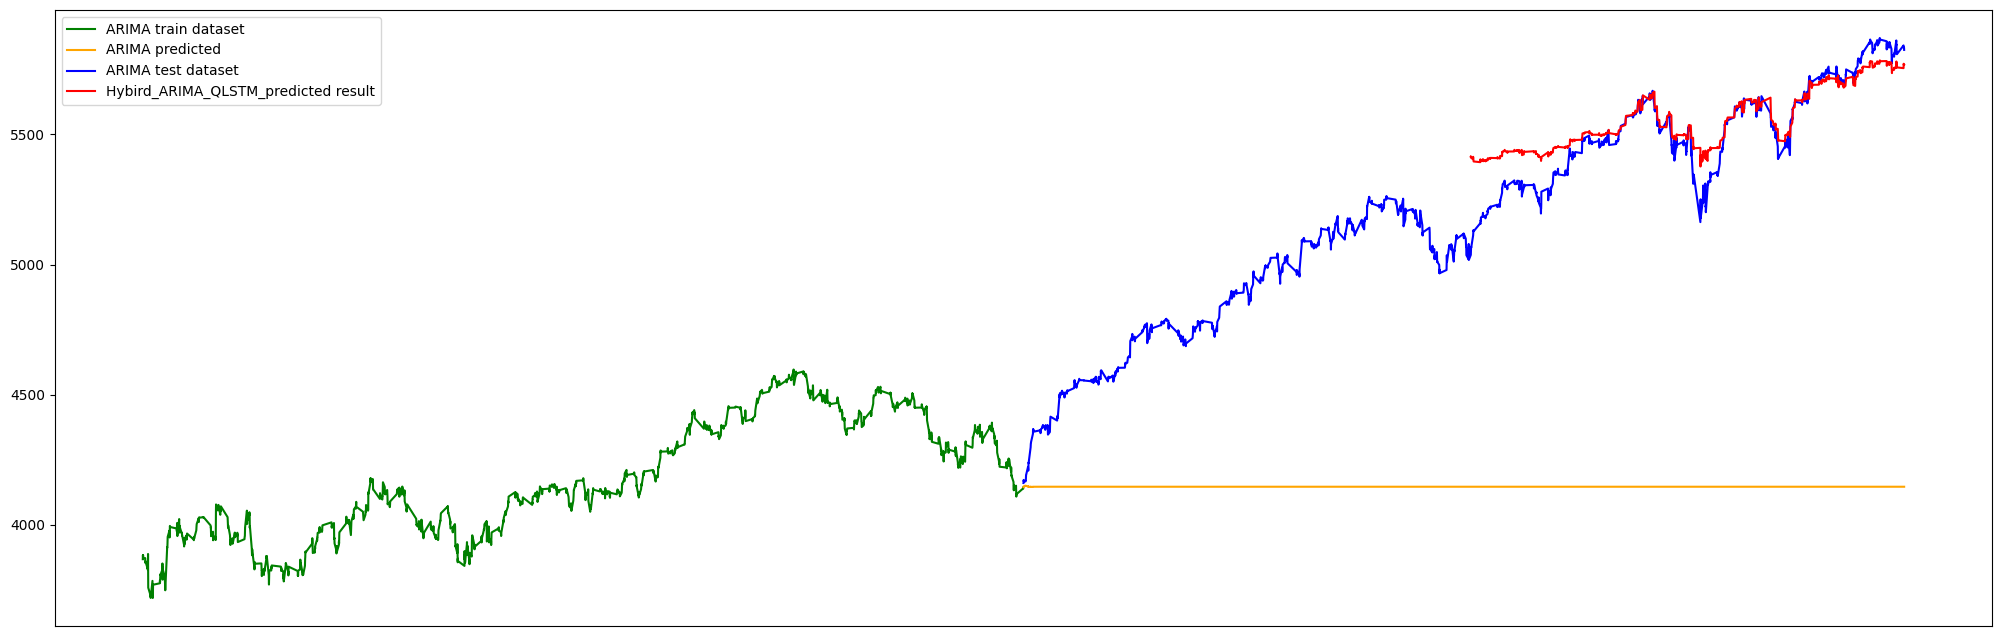

In [38]:
plt.figure(figsize=(25,8))
plt.plot(train_data['Close'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result', color='red')
#plt.axvline(x=len(train_data['Close']), c='black', linestyle='--')
#plt.axvline(x=len(train_data['Close']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result_qlstm,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result_qlstm, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 8802.537398825621
X_test MAE: 65.43426904645175
X_test RMSE: 93.82183860288404


In [40]:
torch.save(modelQ.state_dict(),'./SavedModels/Stock/SNP500/model/arima_QLSTM_sd')

# **LSTM MODEL**

In [41]:
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [42]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = ShallowRegressionLSTM(num_sensors=1, hidden_units=6)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

In [43]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)} ')

[1/5]  LossQ:36.740656007037614 
[2/5]  LossQ:15.756377693633112 
[3/5]  LossQ:7.482901449773635 
[4/5]  LossQ:5.949029986335518 
[5/5]  LossQ:4.294171336470754 


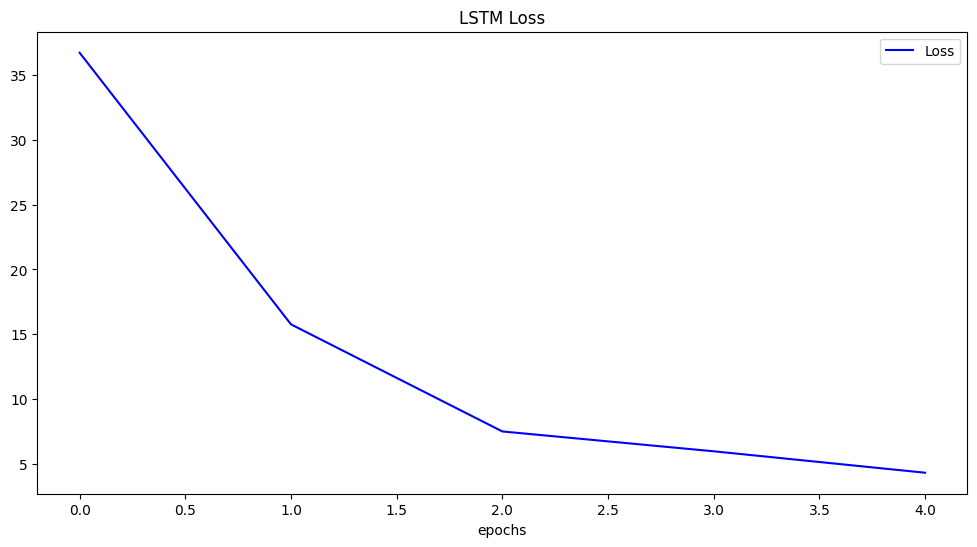

In [44]:
np.savetxt('./SavedModels/Stock/SNP500/loss/arima_lstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('LSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [45]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)

In [46]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [47]:
np.savetxt('./SavedModels/Stock/SNP500/train/arima_lstm.txt',y_train_pred)
np.savetxt('./SavedModels/Stock/SNP500/test/arima_lstm.txt',y_test_pred)

Training dataset MSE: 5689.495454093402 RMSE:75.42874421660089


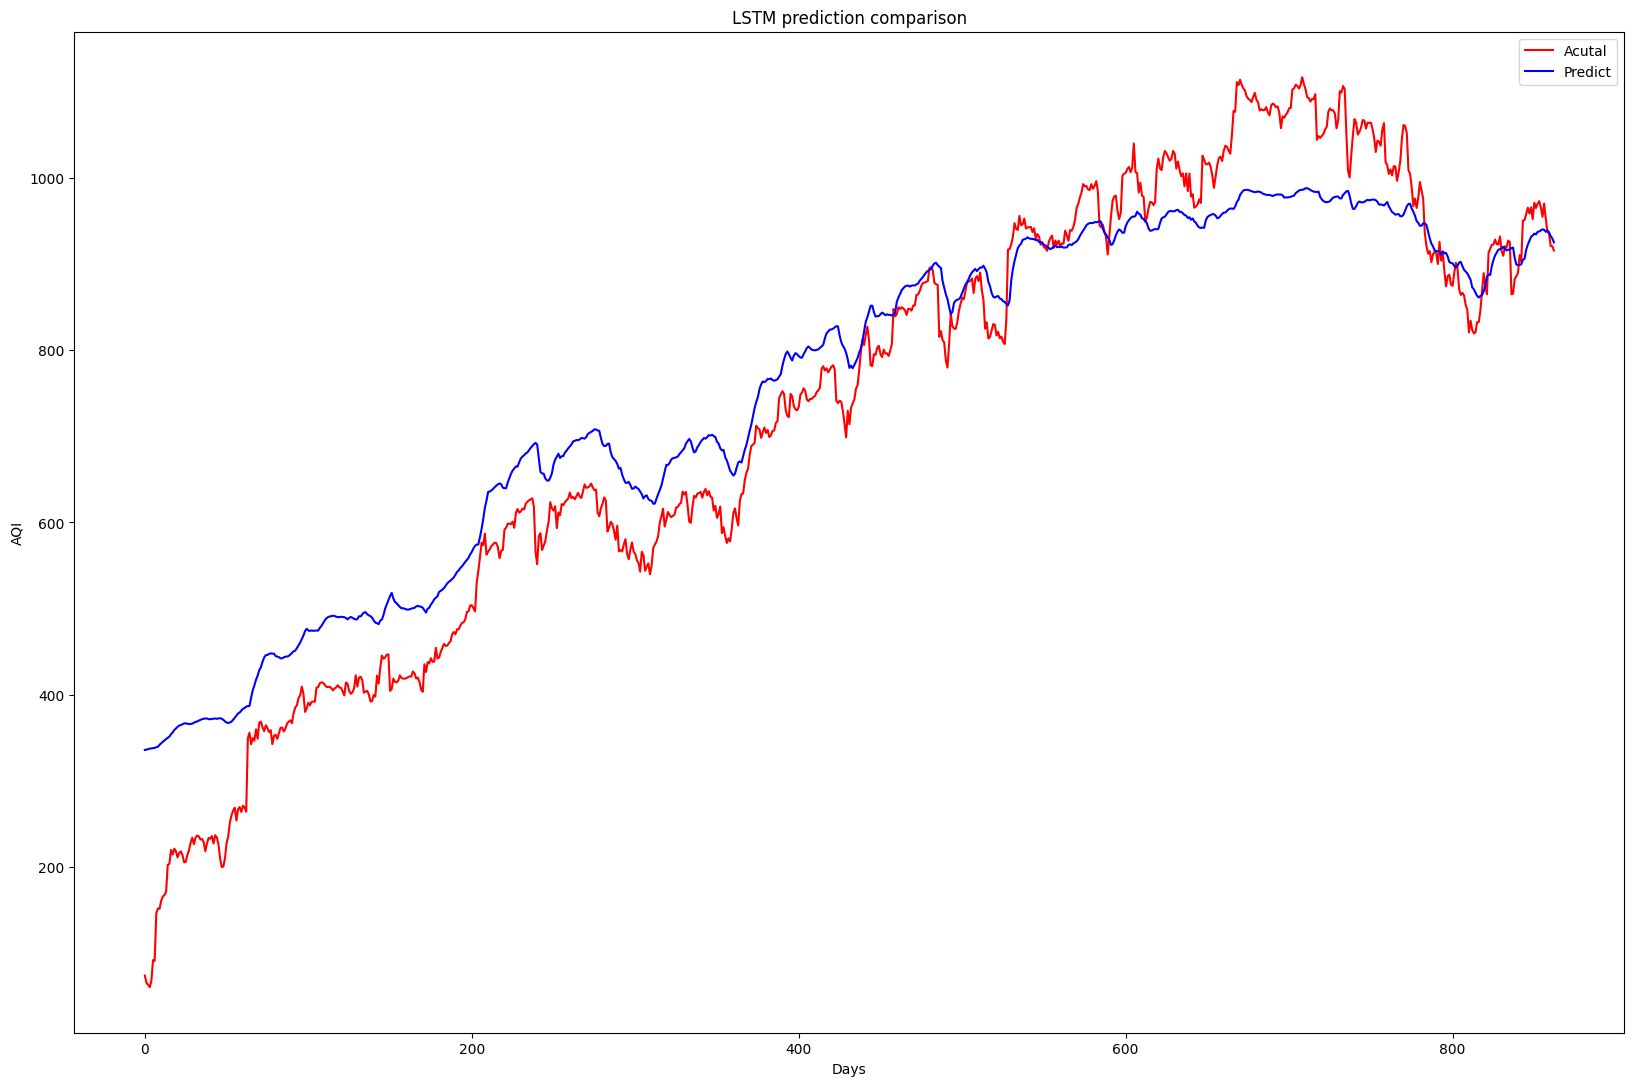

In [48]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('LSTM prediction comparison')
plt.ylabel('AQI')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset RMSE:65.05303732932323


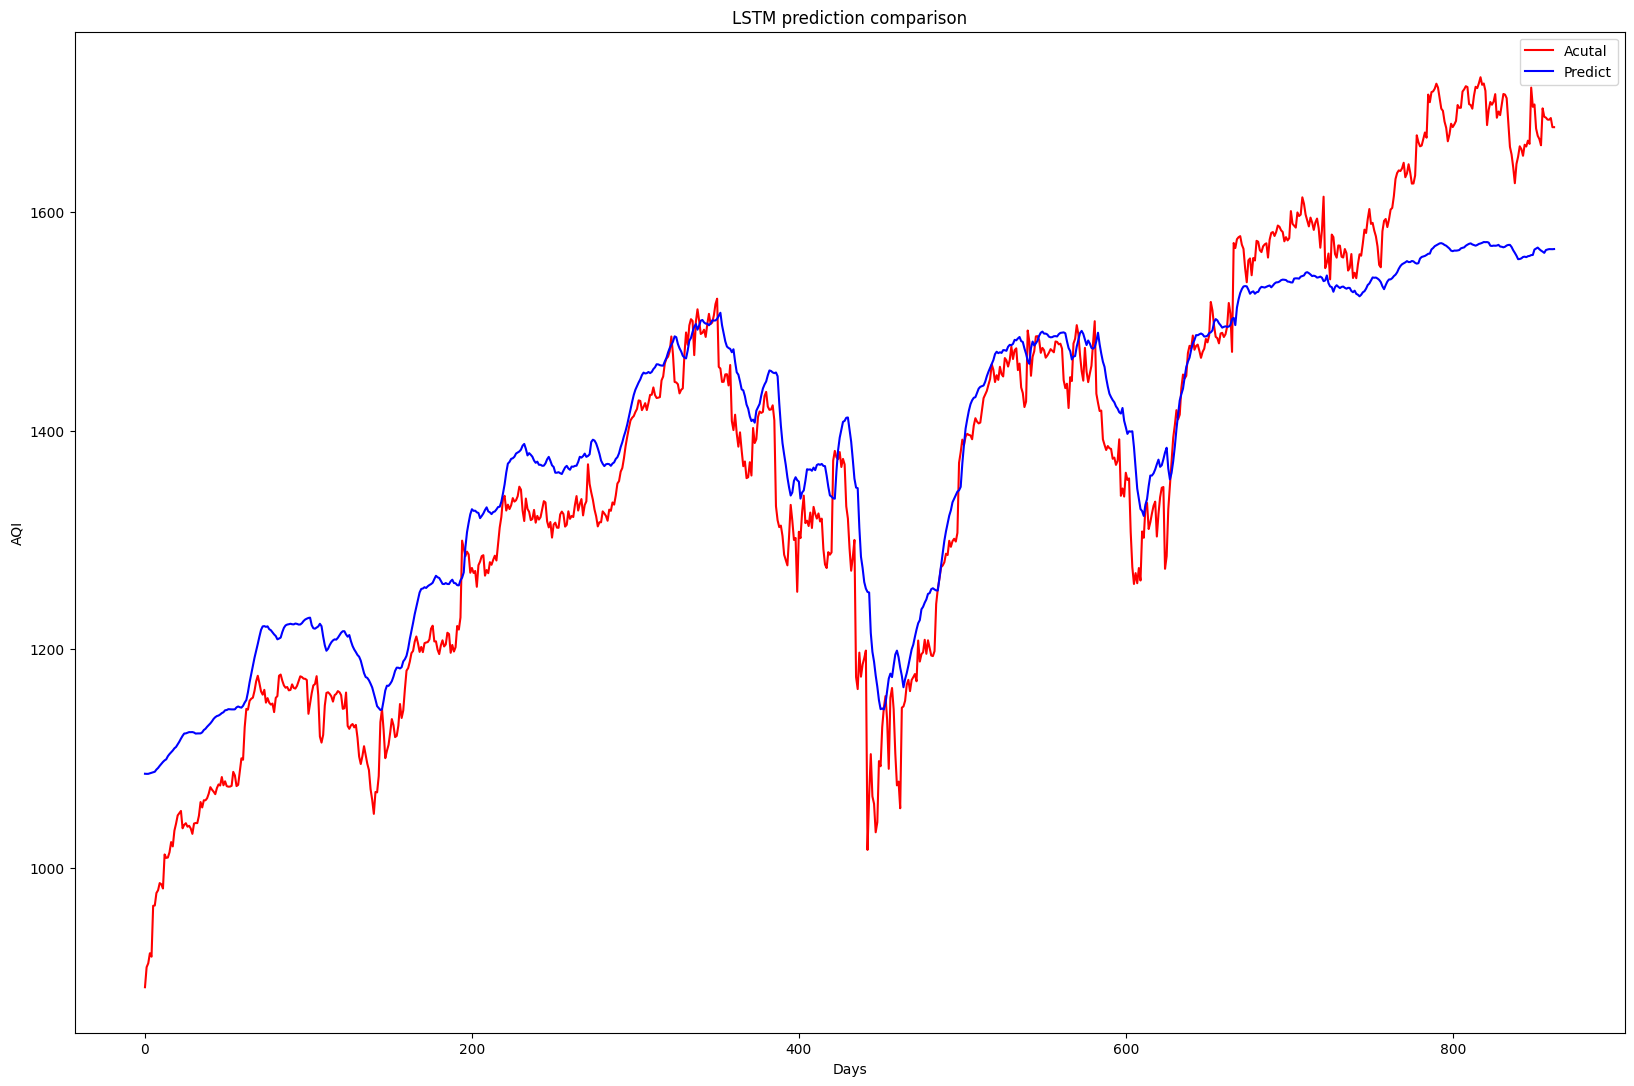

In [49]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('LSTM prediction comparison')
plt.ylabel('AQI')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

In [50]:
final_result= ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [51]:
fr = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
fr['final'] = final_result
fr

,predicted,raw,final
Datetime,,,
2024-05-02 14:30:00+00:00,4146.805726,5036.390137,5232.786805
2024-05-02 15:30:00+00:00,4146.805726,5037.419922,5232.694398
2024-05-02 16:30:00+00:00,4146.805726,5055.740234,5232.717225
2024-05-02 17:30:00+00:00,4146.805726,5059.330078,5233.212953
2024-05-02 18:30:00+00:00,4146.805726,5068.509766,5233.644959
...,...,...,...
2024-10-28 15:30:00+00:00,4146.805726,5833.310059,5712.596498
2024-10-28 16:30:00+00:00,4146.805726,5831.490234,5712.945985
2024-10-28 17:30:00+00:00,4146.805726,5831.359863,5712.877748


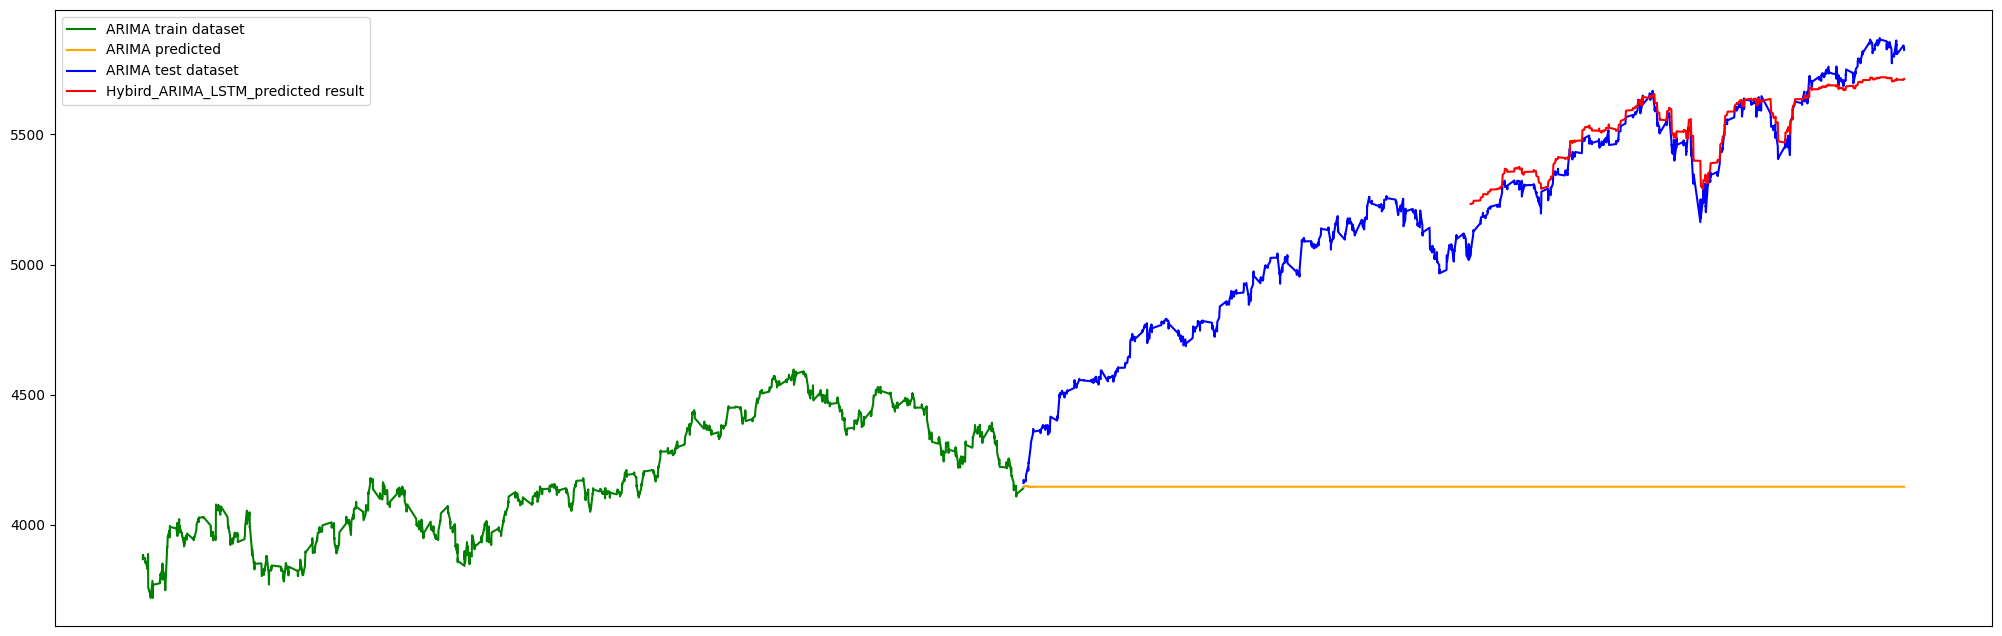

In [52]:
plt.figure(figsize=(25,8))
plt.plot(train_data['Close'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result', color='red')
#plt.axvline(x=len(train_data['Close']), c='black', linestyle='--')
#plt.axvline(x=len(train_data['Close']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

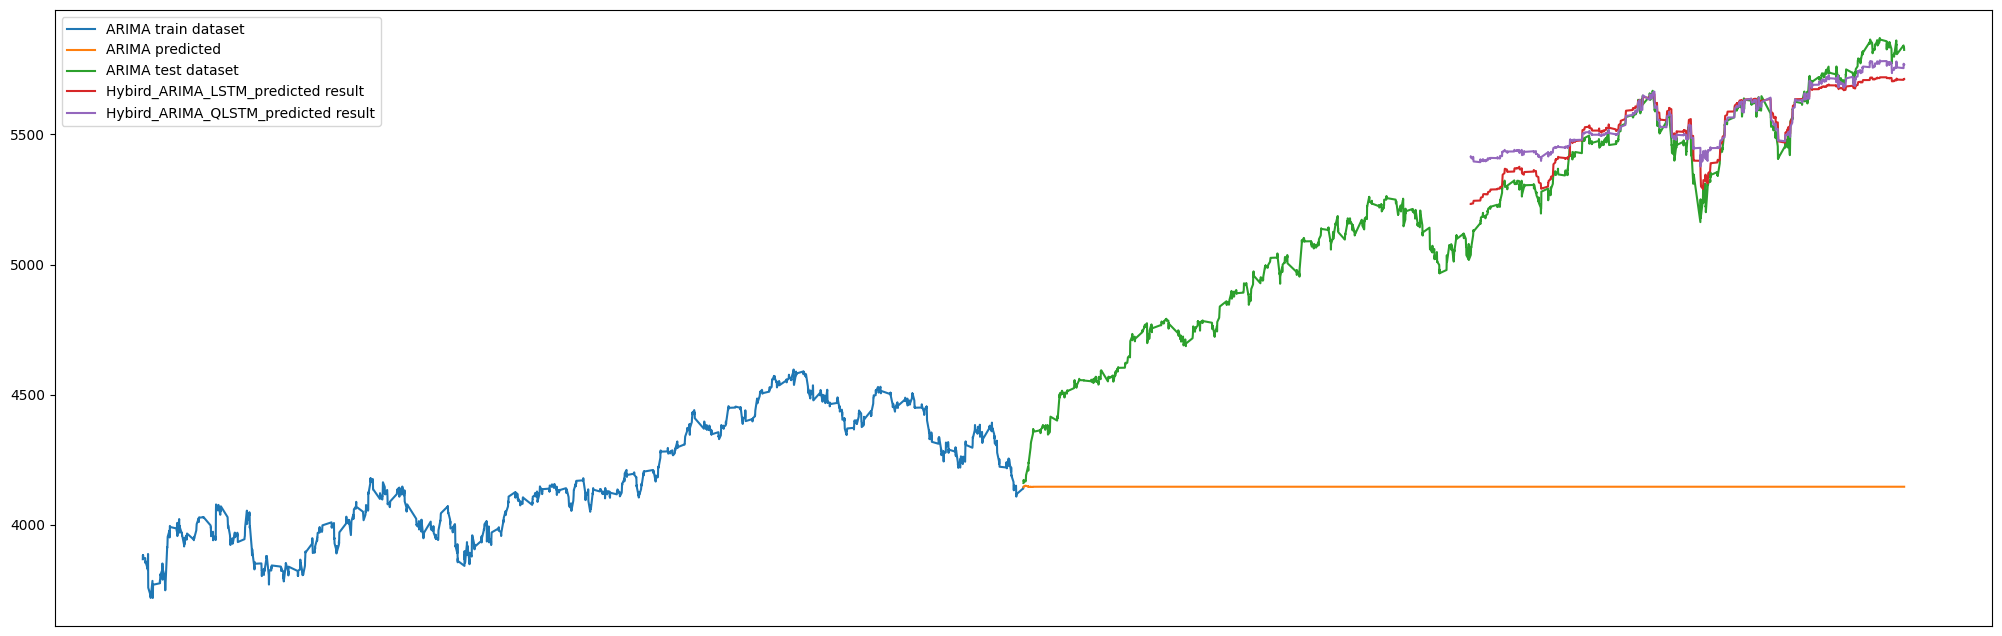

In [53]:
plt.figure(figsize=(25,8))
plt.plot(train_data['Close'], label ='ARIMA train dataset')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset")
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result')
#plt.axvline(x=len(train_data['Close']), c='black', linestyle='--')
#plt.axvline(x=len(train_data['Close']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 4124.788309237536
X_test MAE: 52.830583603513034
X_test RMSE: 64.22451486183088


In [55]:
torch.save(modelQ,'./SavedModels/Stock/SNP500/model/arima_lstm')

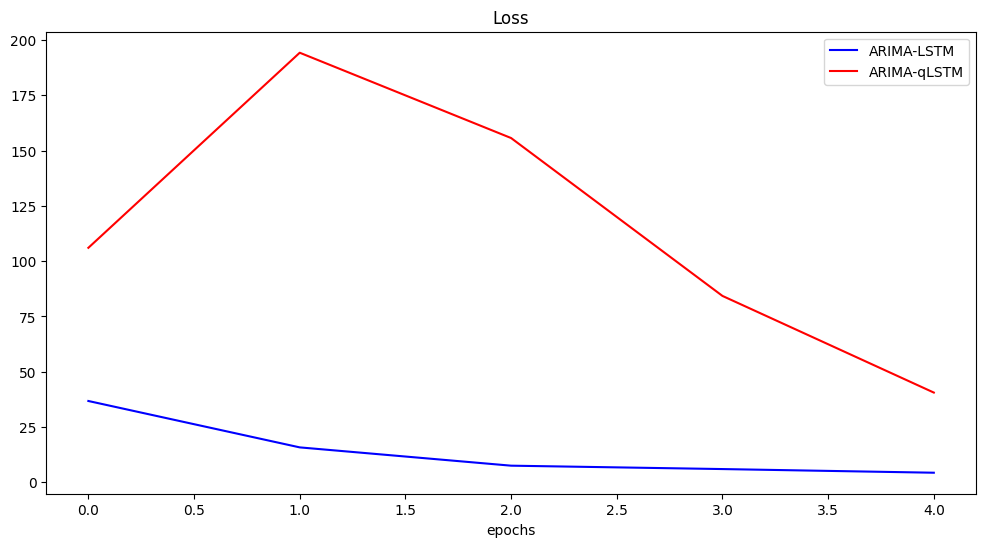

In [56]:
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'ARIMA-LSTM')
plt.plot(histQ1, color='red', label='ARIMA-qLSTM')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')